In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, train_test_split
from tqdm.notebook import tqdm
import pandas as pd
from numpy import mean

ModuleNotFoundError: No module named 'tqdm'

In [2]:
# Laden der Daten
X, y = load_wine(return_X_y=True, as_frame=True )

In [75]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
# Plot der paarweisen Beziehungen der Features
# TODO

# sns.pairplot(X.assign(id=y), hue='id')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [62]:
# Cross-Validation Training der Random Forests über jeweils 1-100 Bäumen 
# TODO

classifiers = [RandomForestClassifier(n, n_jobs=-1) for n in range(1, 101)]

validations = []

for randomForest in tqdm(classifiers):
    randomForest.fit(X_train, y_train)
    validations.append({
        'f1': cross_validate(randomForest, X_test, y_test, scoring="f1_weighted", n_jobs=-1),
        'acc': cross_validate(randomForest, X_test, y_test, scoring="accuracy", n_jobs=-1),
        'recall': cross_validate(randomForest, X_test, y_test, scoring="recall_weighted", n_jobs=-1),
        'precision': cross_validate(randomForest, X_test, y_test, scoring="precision_weighted", n_jobs=-1),
    })
    

  0%|          | 0/100 [00:00<?, ?it/s]

In [66]:



n= 1
data = []

for validation in validations:

    for metric in ["f1", "acc", "precision", "recall"]:
        for score in validation[metric]["test_score"]:
            data.append((n, metric, score))

    n += 1
scores = pd.DataFrame(data=data, columns=["rf", "metric", "score"])



In [67]:
print(scores)

       rf  metric     score
0       1      f1  0.747917
1       1      f1  1.000000
2       1      f1  1.000000
3       1      f1  0.853061
4       1      f1  0.690476
...   ...     ...       ...
1995  100  recall  1.000000
1996  100  recall  0.857143
1997  100  recall  1.000000
1998  100  recall  0.714286
1999  100  recall  1.000000

[2000 rows x 3 columns]


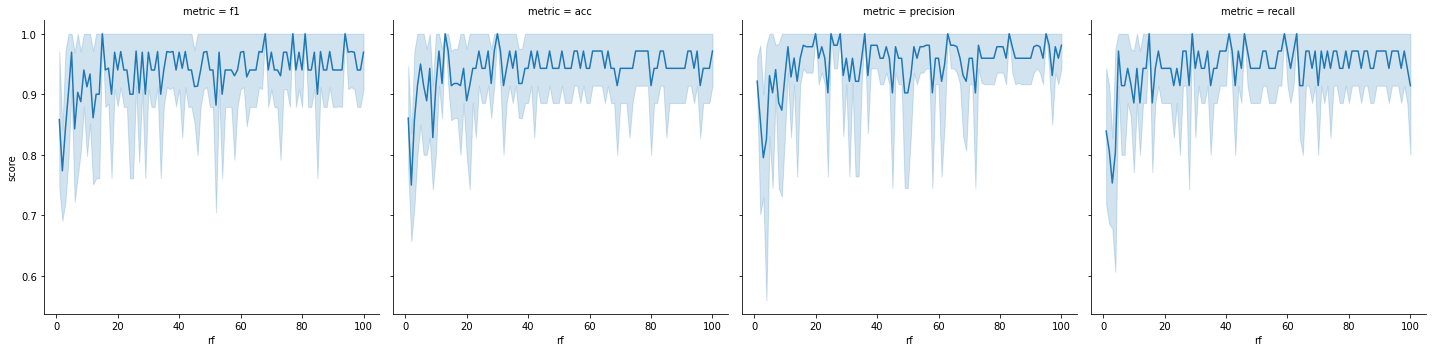

In [65]:
# Plot der Metriken über Anzahl Bäume als Mean + Standard Deviation
# TODO
sns.relplot(data=scores, kind="line", x="rf", y="score", col="metric")

In [72]:
# Feature Wichtigkeit mittels Permutation
# TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

rf = RandomForestClassifier(100)

rf.fit(X_train, y_train)
data=(permutation_importance(rf, X_test, y_test, n_jobs=-1, n_repeats=10))

In [82]:
X.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

<AxesSubplot:>

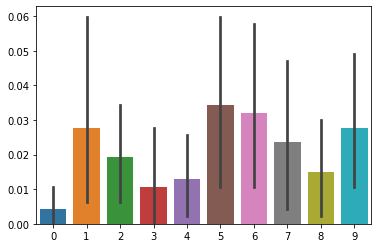

In [88]:


sns.barplot(data=data.importances)